Check for mixed data types and “bad” values (text in numeric columns, categorical features coded as continuous, nulls coded as some other value)

Group your like data types together when they should be treated similarly

Experiment with converting non-numeric variables to numeric

Check for missing values and try some different missingness handling techniques

Make a couple of basic plots of a few of your variables and notice the effects of using different methods on those plots

Keep track of your index, especially if you are removing rows

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats.mstats import winsorize

In [10]:
#Zip file contains only the csv, so you can access it directly with read_csv
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# #Read through this and figure out what we're doing here
# for col in df.describe().columns: nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index df.loc[nanidx, col] = '?'

# # Zip file contains only the csv, so you can access it directly with read_csv df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# #Read through this and figure out what we're doing here
# for col in df.describe().columns: nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index df.loc[nanidx, col] = '?'

In [11]:

for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'


In [12]:
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70)
weight,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

Ordinal - 
Nominal - 
Interval - 
Ratio - 

In [14]:
df.shape

(101766, 50)

In [15]:

df2 = df.replace('?', np.nan)

df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'patient_nbr', 'encounter_id'])

In [16]:
df2.shape

(101766, 45)

In [17]:
df2.isnull().sum()/df2.isnull().count()

race                        0.022336
gender                      0.000000
age                         0.000000
admission_type_id           0.000590
discharge_disposition_id    0.000580
admission_source_id         0.000128
time_in_hospital            0.000884
num_lab_procedures          0.000786
num_procedures              0.000472
num_medications             0.000167
number_outpatient           0.000609
number_emergency            0.000432
number_inpatient            0.000992
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000324
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
t

In [18]:
df2 = df2.dropna()

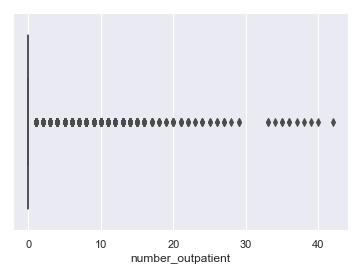

In [19]:
sns.boxplot(df2['number_outpatient'], whis = 5)

In [20]:
df2['number_outpatient'] = winsorize(df2['number_outpatient'], (0, 0.05) )

In [22]:
df2['number_inpatient'] = winsorize(df2['number_inpatient'], (0, 0.05) )
df2['number_emergency'] = winsorize(df2['number_emergency'], (0, 0.05) )


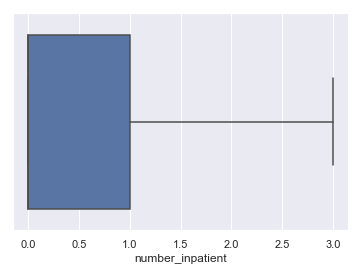

In [23]:
sns.boxplot(df2['number_inpatient'], whis = 5)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97467 entries, 1 to 101765
Data columns (total 46 columns):
race                        97467 non-null object
gender                      97467 non-null object
age                         97467 non-null object
admission_type_id           97467 non-null float64
discharge_disposition_id    97467 non-null float64
admission_source_id         97467 non-null float64
time_in_hospital            97467 non-null float64
num_lab_procedures          97467 non-null float64
num_procedures              97467 non-null float64
num_medications             97467 non-null float64
number_outpatient           97467 non-null float64
number_emergency            97467 non-null float64
number_inpatient            97467 non-null float64
diag_1                      97467 non-null object
diag_2                      97467 non-null object
diag_3                      97467 non-null object
number_diagnoses            97467 non-null float64
max_glu_serum               9

In [31]:
df2['readmitted'].dtype

dtype('O')

In [37]:
readmit = ['>30', '<30']

df2['readmitted_bool'] = df2['readmitted'].isin(readmit)




In [38]:
df2['readmitted_bool'].value_counts()

False    52032
True     45435
Name: readmitted_bool, dtype: int64

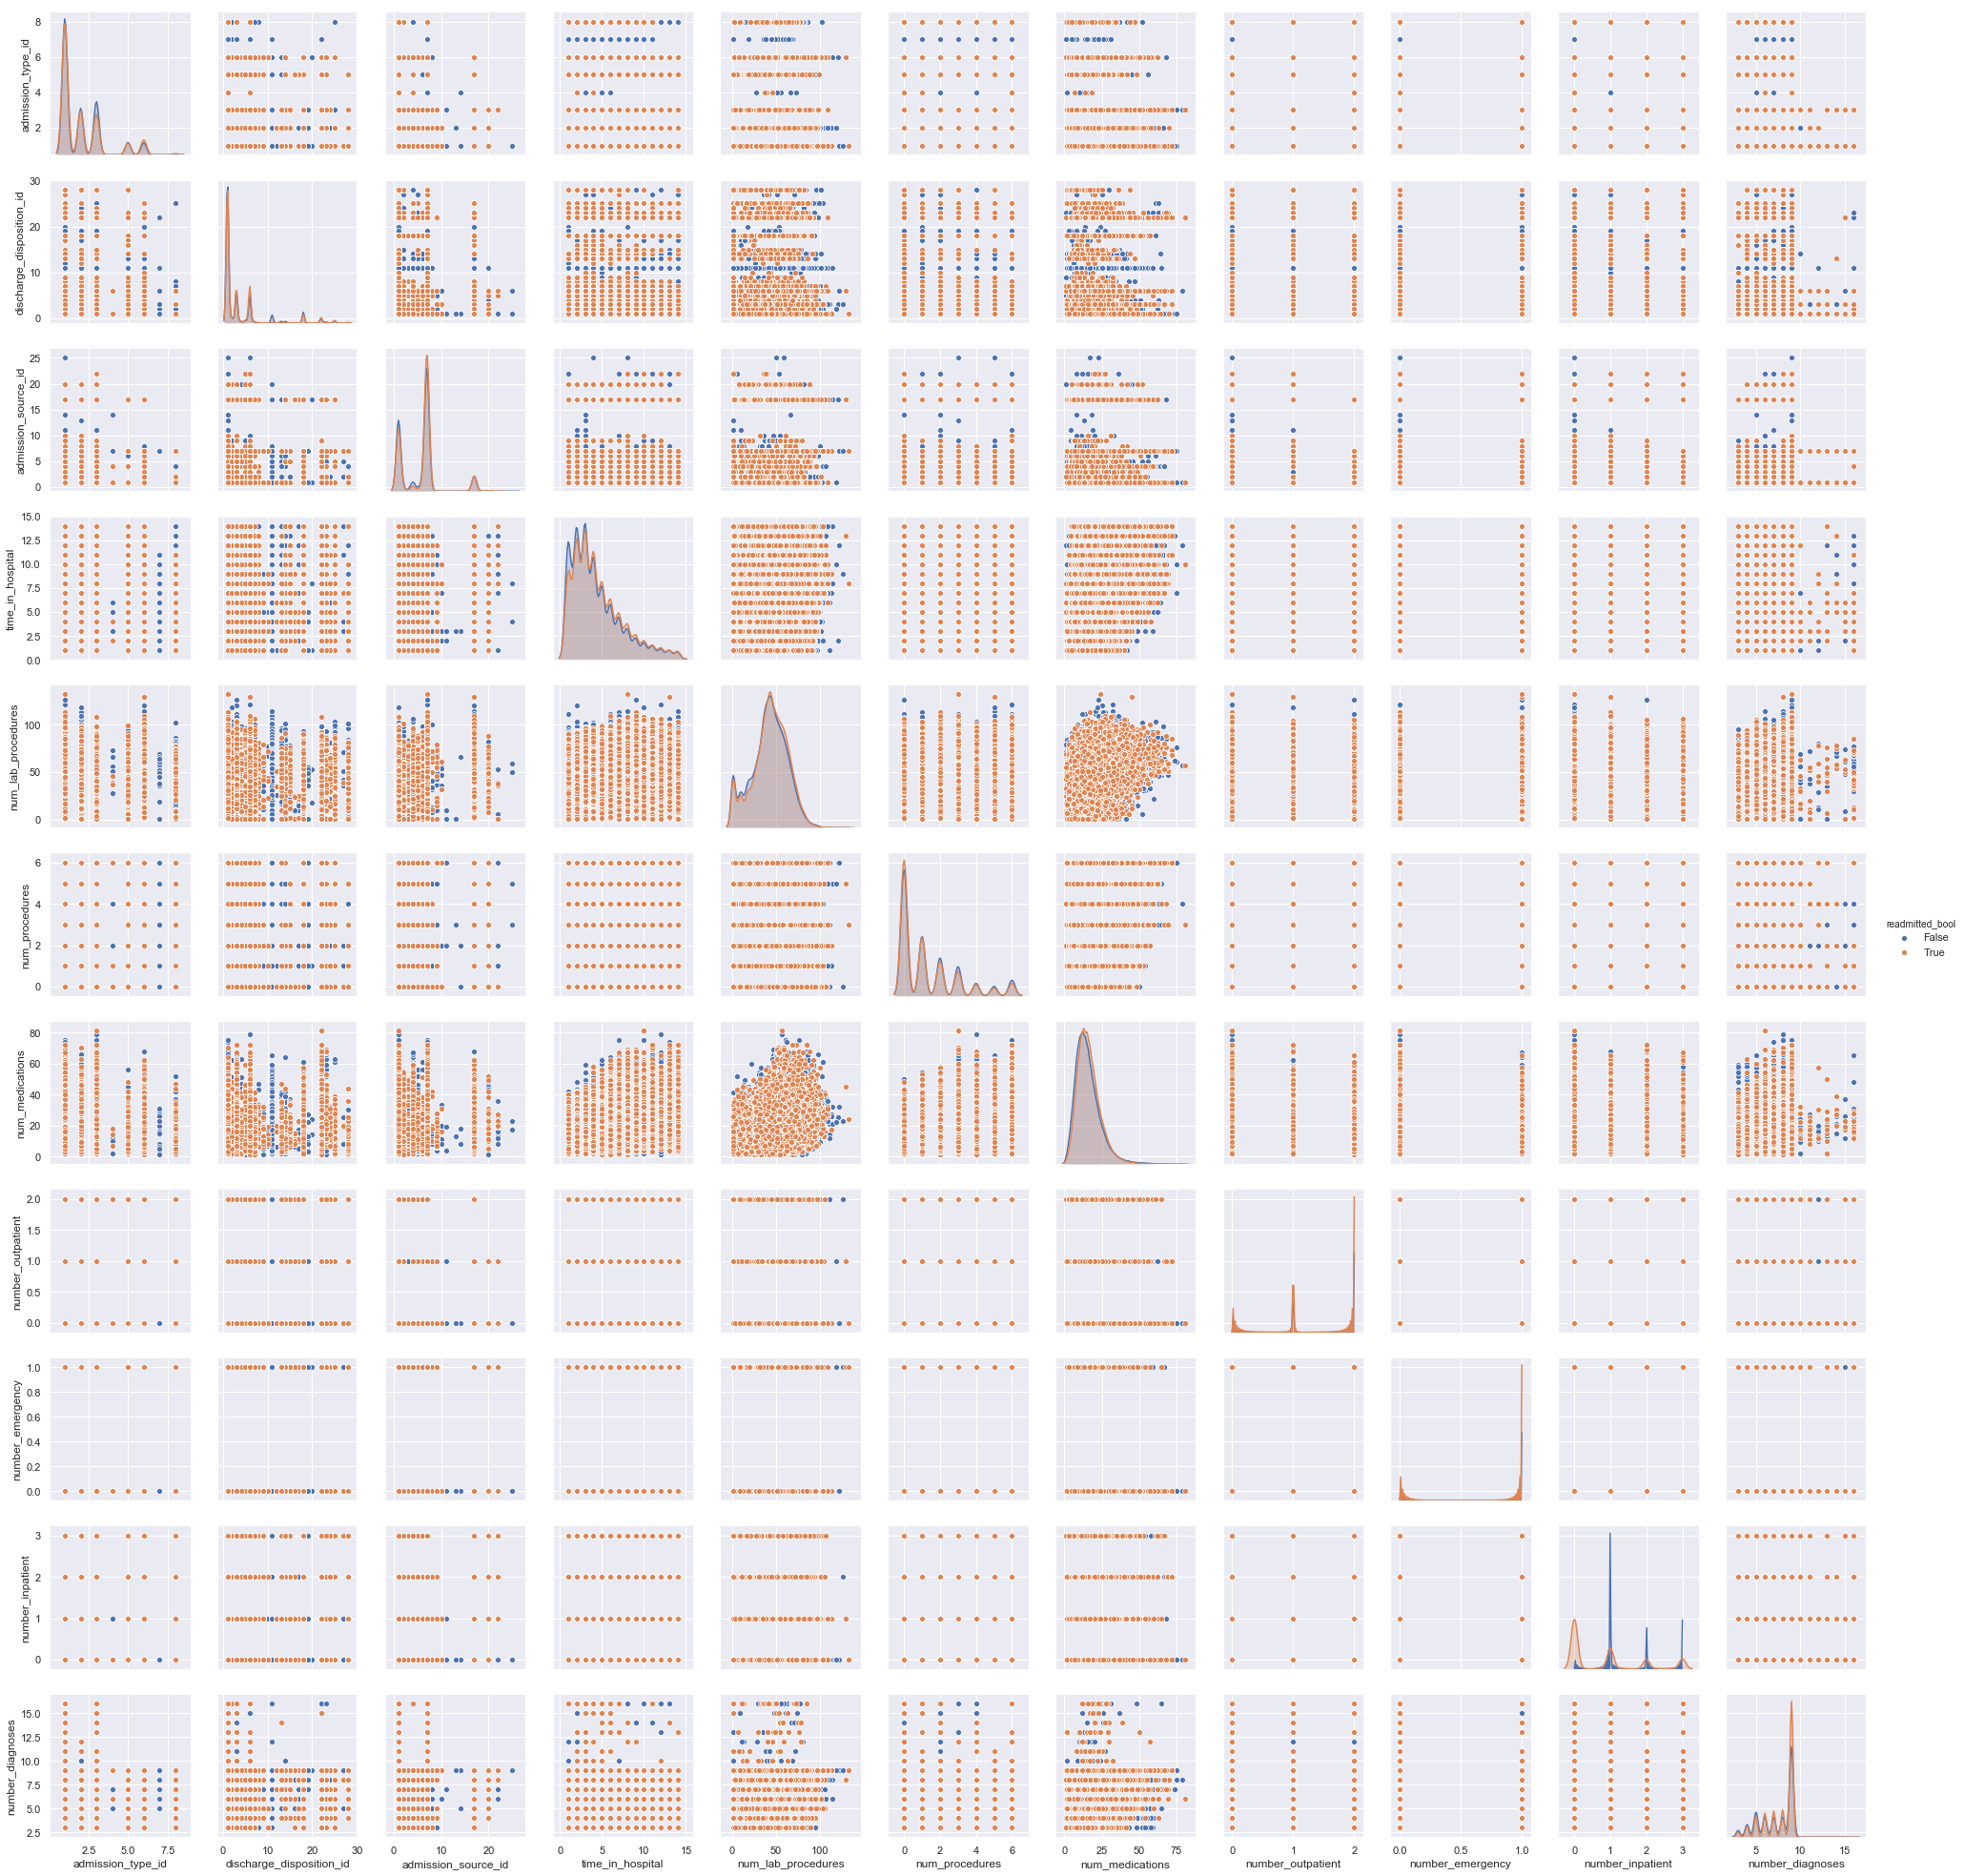

In [48]:
sns.pairplot(df2, vars = columns_2, hue = 'readmitted_bool')

In [43]:
columns_2 = df2.select_dtypes(include = 'number').columns